In [ ]:
# Imports
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
#Loading The Dataset
df_Banglore=pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/Bangalore_1990_2022_BangaloreCity.csv")
df_Madras=pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/Chennai_1990_2022_Madras.csv")
df_Delhi=pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/Delhi_NCR_1990_2022_Safdarjung.csv")
df_Lucknow=pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv")
df_Mumbai=pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/Mumbai_1990_2022_Santacruz.csv")
df_Rajasthan=pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/Rajasthan_1990_2022_Jodhpur.csv")
#df7=pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv")
#df8=pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/weather_Bhubhneshwar_1990_2022.csv")
#df9=pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/weather_Rourkela_2021_2022.csv")

# **Banglore**

In [ ]:
df_Banglore.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


<Axes: >

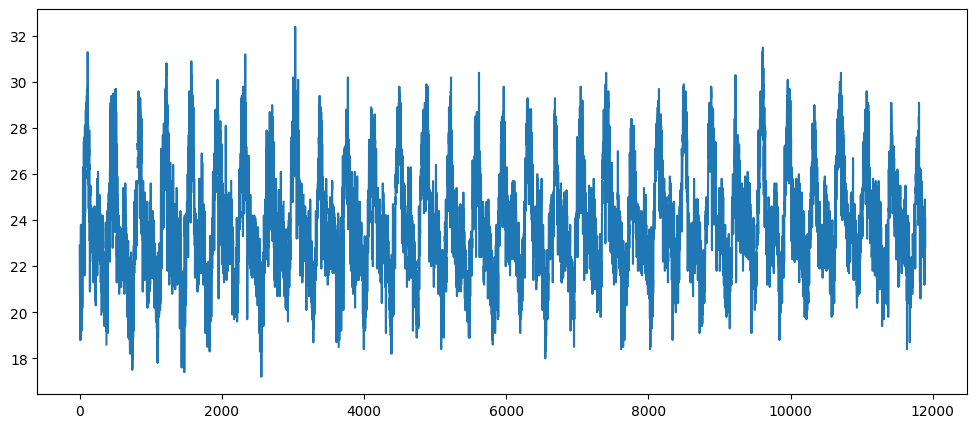

In [ ]:
df_Banglore['tavg'].plot(figsize=(12,5))

In [ ]:
df_Banglore.isnull().sum()

time       0
tavg      70
tmin    1389
tmax     629
prcp    4620
dtype: int64

Replacing null values of tavg with average of tmax and tmin 
And if either tmax or tmin is null then replacing it with mean of tavg

In [ ]:
# Calculate the mean of 'tavg'
tavg_mean = df_Banglore['tavg'].mean()


# Calculate the average of 'tmax' and 'tmin' and update the 'tavg' column for null values
df_Banglore.loc[df_Banglore['tavg'].isnull(), 'tavg'] = df_Banglore['tmax'] + df_Banglore['tmin'] / 2

# Replace null values in 'tavg' with the mean of 'tavg'
df_Banglore['tavg'].fillna(tavg_mean, inplace=True)

In [ ]:
print(tavg_mean)

23.840426251691472


In [ ]:
df_Banglore.isnull().sum()

time       0
tavg       0
tmin    1389
tmax     629
prcp    4620
dtype: int64

Checking for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(df_Banglore['tavg'])

1. ADF :  -10.628674384876115
2. P-Value :  5.283354414915021e-19
3. Num Of Lags :  40
4. Num Of Observations Used For ADF Regression: 11853
5. Critical Values :
	 1% :  -3.430901819518007
	 5% :  -2.8617838756006195
	 10% :  -2.566899809920393


as p<0.05 Data is stationary

Now Traing the model using ARIMA Model

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.7 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_Banglore['tavg'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=32363.607, Time=58.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=53601.905, Time=0.72 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=33494.247, Time=2.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=44454.652, Time=3.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=109307.038, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=32531.735, Time=17.98 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=32363.788, Time=32.56 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=32367.071, Time=34.73 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=32367.579, Time=43.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=32798.566, Time=12.61 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=32412.066, Time=26.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=32384.636, Time=47.78 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=32365.861, Time=48.74 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=32438.682, Time=5.08 sec

Best mod

Splitting Data into Training And Testing

In [ ]:
print(df_Banglore.shape)
train=df_Banglore.iloc[:-30]
test=df_Banglore.iloc[-30:]
print(train.shape,test.shape)

(11894, 5)
(11864, 5) (30, 5)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['tavg'],order=(2,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tavg   No. Observations:                11864
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -16137.525
Date:                Sat, 15 Apr 2023   AIC                          32287.050
Time:                        08:25:07   BIC                          32331.338
Sample:                             0   HQIC                         32301.915
                              - 11864                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8233      0.253     94.210      0.000      23.328      24.319
ar.L1          1.5247      0.028     54.363      0.000       1.470       1.580
ar.L2         -0.5304      0.027    -19.315      0.000      -0.584      -0.477
ma.L1         -0.8736      0.029    -30.175      0.000      -0.930      -0.817
ma.L2          0.0350      0.017      2.107      0.035       0.002       0.068
sigma2         0.8890      0.009     96.597      0.000       0.871       0.907
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1357.00
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

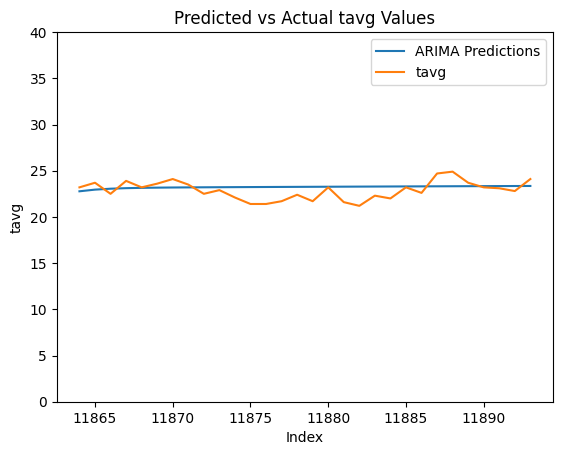

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['tavg'].plot(legend=True)

# Set the title and axis labels
plt.title('Predicted vs Actual tavg Values')
plt.xlabel('Index')
plt.ylabel('tavg')

# Set the y-axis ticks to intervals of 10
plt.yticks(range(0, max(test['tavg'].astype(int))+20, 5))


plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['tavg'].mean()
rmse=sqrt(mean_squared_error(pred,test['tavg']))
print(rmse)

1.0443634991942776


In [ ]:
test_mean = test['tavg'].mean()
print((rmse/test_mean) * 100) 

4.5645257831917725


as root mean square error is very low in comparision to mean of test
(Only 4.564%), we can say that the ARIMA model is a success

# **Madras**

In [ ]:
df_Madras.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0


<Axes: >

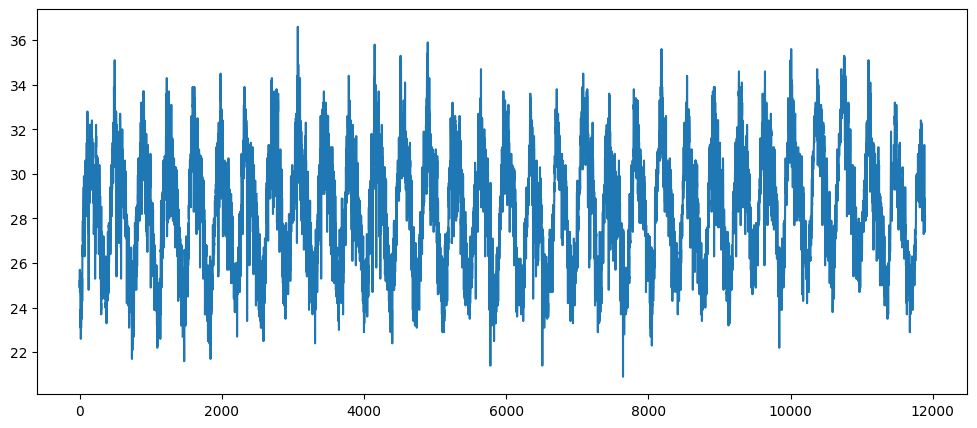

In [ ]:
df_Madras['tavg'].plot(figsize=(12,5))

In [ ]:
df_Madras.isnull().sum()

time       0
tavg      27
tmin    3084
tmax    1019
prcp    4886
dtype: int64

In [ ]:
# Calculate the mean of 'tavg'
tavg_mean = df_Madras['tavg'].mean()


# Calculate the average of 'tmax' and 'tmin' and update the 'tavg' column for null values
df_Madras.loc[df_Madras['tavg'].isnull(), 'tavg'] = df_Madras['tmax'] + df_Madras['tmin'] / 2

# Replace null values in 'tavg' with the mean of 'tavg'
df_Madras['tavg'].fillna(tavg_mean, inplace=True)

In [ ]:
df_Madras.isnull().sum()

time       0
tavg       0
tmin    3084
tmax    1019
prcp    4886
dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(df_Madras['tavg'])

1. ADF :  -8.286459660147843
2. P-Value :  4.3773405277278904e-13
3. Num Of Lags :  39
4. Num Of Observations Used For ADF Regression: 11854
5. Critical Values :
	 1% :  -3.4309017729565863
	 5% :  -2.8617838550247985
	 10% :  -2.566899798967979


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_Madras['tavg'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=35.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32710.431, Time=4.98 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32244.456, Time=1.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32052.893, Time=2.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32708.432, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=31305.535, Time=8.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31307.144, Time=28.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31307.181, Time=13.78 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=31682.311, Time=6.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=32040.024, Time=2.47 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=31303.548, Time=1.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=32050.894, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=32242.457, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=31305.157, Time=3.31 sec
 ARIMA(1,1,2)(0,0,0)[0

In [ ]:
print(df_Madras.shape)
mtrain=df_Madras.iloc[:-30]
mtest=df_Madras.iloc[-30:]
print(mtrain.shape,mtest.shape)

(11894, 5)
(11864, 5) (30, 5)


In [ ]:
del model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(mtrain['tavg'],order=(1,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tavg   No. Observations:                11864
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15613.885
Date:                Fri, 14 Apr 2023   AIC                          31233.770
Time:                        06:22:17   BIC                          31255.914
Sample:                             0   HQIC                         31241.203
                              - 11864                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5775      0.011     51.579      0.000       0.556       0.599
ma.L1         -0.8672      0.008   -115.316      0.000      -0.882      -0.852
sigma2         0.8142      0.007    112.108      0.000       0.800       0.828
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              3216.62
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

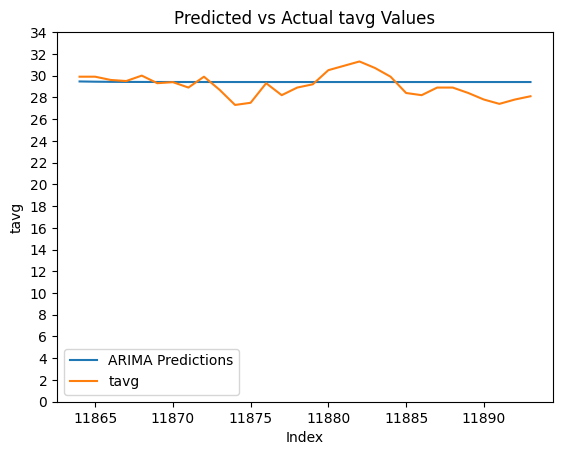

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
mtest['tavg'].plot(legend=True)

# Set the title and axis labels
plt.title('Predicted vs Actual tavg Values')
plt.xlabel('Index')
plt.ylabel('tavg')

# Set the y-axis ticks to intervals of 10
plt.yticks(range(0, max(mtest['tavg'].astype(int))+5, 2))

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mtest['tavg'].mean()
rmse=sqrt(mean_squared_error(pred,mtest['tavg']))
print(rmse)

1.0881829345573593


In [ ]:
mtest_mean = mtest['tavg'].mean()
print((rmse/mtest_mean) * 100) 

3.7407457358451683


# **Delhi**

In [ ]:
df_Delhi.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,9.4,6.0,15.1,0.0
1,02-01-1990,9.3,5.2,14.2,0.0
2,03-01-1990,9.0,6.5,13.6,0.0
3,04-01-1990,10.7,6.0,17.5,0.0
4,05-01-1990,12.6,7.3,20.8,0.0


<Axes: >

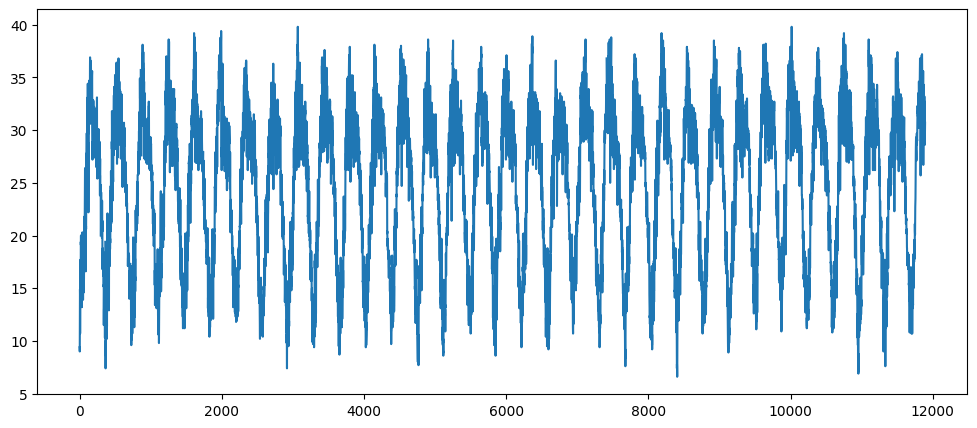

In [ ]:
df_Delhi['tavg'].plot(figsize=(12,5))

In [ ]:
df_Delhi.isnull().sum()

time       0
tavg      94
tmin    1536
tmax     533
prcp    6140
dtype: int64

In [ ]:
# Calculate the mean of 'tavg'
tavg_mean = df_Delhi['tavg'].mean()

# Calculate the average of 'tmax' and 'tmin' and update the 'tavg' column for null values
df_Delhi.loc[df_Delhi['tavg'].isnull(), 'tavg'] = df_Delhi['tmax'] + df_Delhi['tmin'] / 2

# Replace null values in 'tavg' with the mean of 'tavg'
df_Delhi['tavg'].fillna(tavg_mean, inplace=True)

In [ ]:
df_Delhi.isnull().sum()

time       0
tavg       0
tmin    1536
tmax     533
prcp    6140
dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(df_Delhi['tavg'])

1. ADF :  -10.457949565888047
2. P-Value :  1.382853364734792e-18
3. Num Of Lags :  40
4. Num Of Observations Used For ADF Regression: 11853
5. Critical Values :
	 1% :  -3.430901819518007
	 5% :  -2.8617838756006195
	 10% :  -2.566899809920393


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_Delhi['tavg'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=45885.632, Time=25.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=81034.834, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=46731.653, Time=2.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=68668.337, Time=4.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=111295.571, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=46058.060, Time=10.65 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=45888.847, Time=26.30 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=45876.693, Time=43.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=45885.297, Time=29.09 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=45869.048, Time=50.09 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=45884.336, Time=32.95 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=45864.643, Time=57.04 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=45879.470, Time=45.81 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=45868.080, Time=72.82 sec
 ARIMA(4

In [ ]:
print(df_Delhi.shape)
dtrain=df_Delhi.iloc[:-30]
dtest=df_Delhi.iloc[-30:]
print(dtrain.shape,dtest.shape)

(11894, 5)
(11864, 5) (30, 5)


In [ ]:
del model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(dtrain['tavg'],order=(5,0,2))
model=model.fit()
model.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tavg   No. Observations:                11864
Model:                 ARIMA(5, 0, 2)   Log Likelihood              -22860.109
Date:                Fri, 14 Apr 2023   AIC                          45738.218
Time:                        06:16:09   BIC                          45804.649
Sample:                             0   HQIC                         45760.515
                              - 11864                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8608      1.174     21.181      0.000      22.560      27.161
ar.L1          0.5497      0.022     25.079      0.000       0.507       0.593
ar.L2          0.9531      0.011     85.888      0.000       0.931       0.975
ar.L3         -0.5510      0.017    -32.952      0.000      -0.584      -0.518
ar.L4          0.0317      0.008      4.059      0.000       0.016       0.047
ar.L5          0.0109      0.009      1.202      0.229      -0.007       0.029
ma.L1          0.2183      0.021     10.261      0.000       0.177       0.260
ma.L2         -0.7585      0.020    -37.551      0.000      -0.798      -0.719
sigma2         2.7586      0.023    119.484      0.000       2.713       2.804
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             12564.30
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

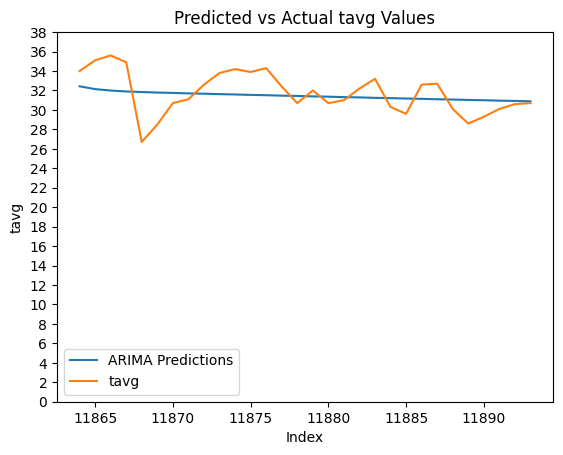

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
dtest['tavg'].plot(legend=True)

# Set the title and axis labels
plt.title('Predicted vs Actual tavg Values')
plt.xlabel('Index')
plt.ylabel('tavg')

# Set the y-axis ticks to intervals of 10
plt.yticks(range(0, max(dtest['tavg'].astype(int))+5, 2))

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
dtest['tavg'].mean()
rmse=sqrt(mean_squared_error(pred,dtest['tavg']))
print(rmse)

2.026823971640184


In [ ]:
dtest_mean = dtest['tavg'].mean()
print((rmse/dtest_mean) * 100) 

6.385708795337694


# **Lucknow**

In [ ]:
df_Lucknow.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,7.2,NaN,18.1,0.0
1,02-01-1990,10.5,NaN,17.2,0.0
2,03-01-1990,10.2,1.8,18.6,NaN
3,04-01-1990,9.1,NaN,19.3,0.0
4,05-01-1990,13.5,NaN,23.8,0.0


<Axes: >

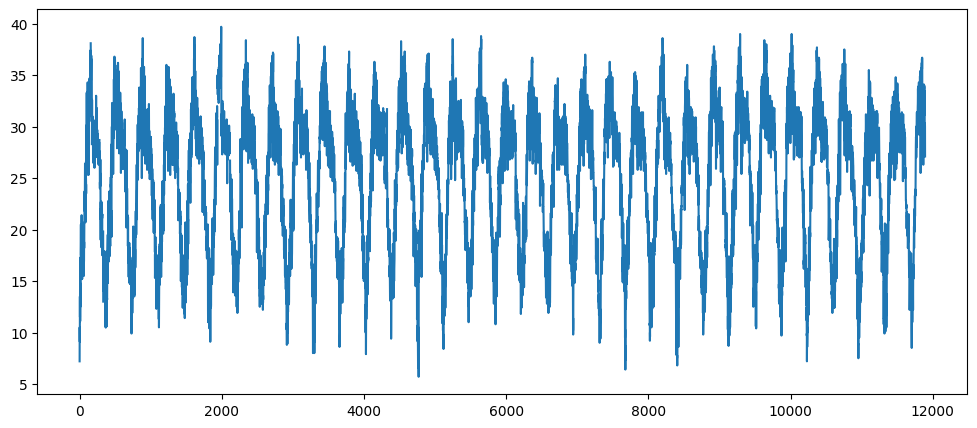

In [ ]:
df_Lucknow['tavg'].plot(figsize=(12,5))

In [ ]:
df_Lucknow.isnull().sum()

time       0
tavg     138
tmin    3515
tmax    1553
prcp    6152
dtype: int64

In [ ]:
# Calculate the mean of 'tavg'
tavg_mean = df_Lucknow['tavg'].mean()

# Calculate the average of 'tmax' and 'tmin' and update the 'tavg' column for null values
df_Lucknow.loc[df_Lucknow['tavg'].isnull(), 'tavg'] = df_Lucknow['tmax'] + df_Lucknow['tmin'] / 2

# Replace null values in 'tavg' with the mean of 'tavg'
df_Lucknow['tavg'].fillna(tavg_mean, inplace=True)

In [ ]:
df_Lucknow.isnull().sum()

time       0
tavg       0
tmin    3515
tmax    1553
prcp    6152
dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(df_Lucknow['tavg'])

1. ADF :  -10.69703600644625
2. P-Value :  3.602608542648705e-19
3. Num Of Lags :  40
4. Num Of Observations Used For ADF Regression: 11853
5. Critical Values :
	 1% :  -3.430901819518007
	 5% :  -2.8617838756006195
	 10% :  -2.566899809920393


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_Lucknow['tavg'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=45491.418, Time=33.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=78928.041, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=46485.276, Time=4.72 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=66927.388, Time=5.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=111341.916, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=45636.820, Time=11.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=45491.639, Time=19.41 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=45484.712, Time=39.78 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=45491.316, Time=32.19 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=45482.444, Time=46.44 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=45492.053, Time=49.43 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=45484.178, Time=59.91 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=55.10 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=45482.634, Time=48.12 sec
 ARIMA(5,0,1)(

In [ ]:
print(df_Lucknow.shape)
ltrain=df_Lucknow.iloc[:-30]
ltest=df_Lucknow.iloc[-30:]
print(ltrain.shape,ltest.shape)

(11894, 5)
(11864, 5) (30, 5)


In [ ]:
del model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(ltrain['tavg'],order=(4,0,2))
model=model.fit()
model.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tavg   No. Observations:                11864
Model:                 ARIMA(4, 0, 2)   Log Likelihood              -22671.996
Date:                Fri, 14 Apr 2023   AIC                          45359.991
Time:                        06:43:24   BIC                          45419.041
Sample:                             0   HQIC                         45379.811
                              - 11864                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4408      1.055     23.161      0.000      22.373      26.509
ar.L1          0.5197      0.017     31.151      0.000       0.487       0.552
ar.L2          0.9669      0.011     84.081      0.000       0.944       0.989
ar.L3         -0.5137      0.016    -32.233      0.000      -0.545      -0.482
ar.L4          0.0211      0.009      2.311      0.021       0.003       0.039
ma.L1          0.2112      0.016     13.436      0.000       0.180       0.242
ma.L2         -0.7713      0.016    -49.160      0.000      -0.802      -0.741
sigma2         2.6747      0.024    113.439      0.000       2.628       2.721
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8020.84
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

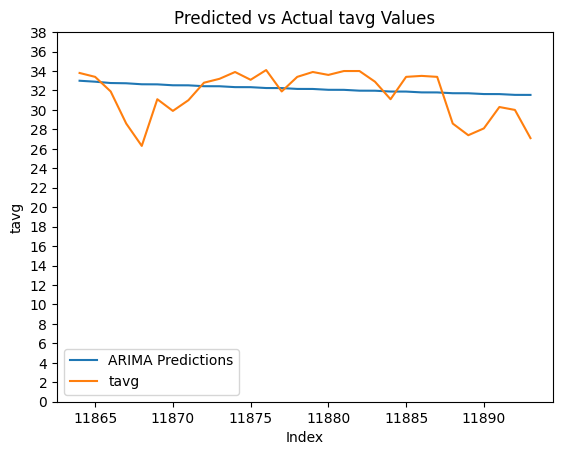

In [ ]:
start=len(ltrain)
end=len(ltrain)+len(ltest)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
ltest['tavg'].plot(legend=True)

# Set the title and axis labels
plt.title('Predicted vs Actual tavg Values')
plt.xlabel('Index')
plt.ylabel('tavg')

# Set the y-axis ticks to intervals of 10
plt.yticks(range(0, max(ltest['tavg'].astype(int))+5, 2))

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
ltest['tavg'].mean()
rmse=sqrt(mean_squared_error(pred,ltest['tavg']))
print(rmse)

2.3558265619789562


In [ ]:
ltest_mean = ltest['tavg'].mean()
print((rmse/ltest_mean) * 100) 

7.4418023438316


# **Mumbai**

In [ ]:
df_Mumbai.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,NaN,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0


<Axes: >

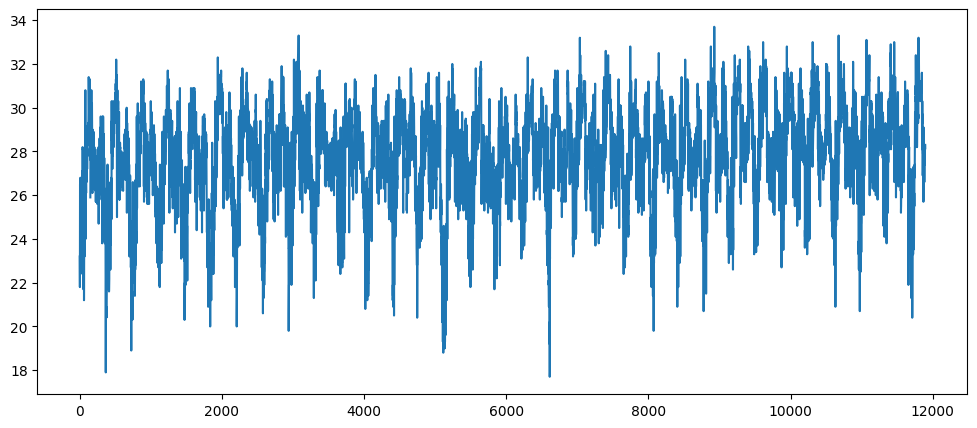

In [ ]:
df_Mumbai['tavg'].plot(figsize=(12,5))

In [ ]:
df_Mumbai.isnull().sum()

time       0
tavg      11
tmin    2454
tmax    1907
prcp    4681
dtype: int64

In [ ]:
# Calculate the mean of 'tavg'
tavg_mean = df_Mumbai['tavg'].mean()


# Calculate the average of 'tmax' and 'tmin' and update the 'tavg' column for null values
df_Mumbai.loc[df_Mumbai['tavg'].isnull(), 'tavg'] = df_Mumbai['tmax'] + df_Mumbai['tmin'] / 2

# Replace null values in 'tavg' with the mean of 'tavg'
df_Mumbai['tavg'].fillna(tavg_mean, inplace=True)

In [ ]:
df_Mumbai.isnull().sum()

time       0
tavg       0
tmin    2454
tmax    1907
prcp    4681
dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(df_Mumbai['tavg'])

1. ADF :  -10.79000665964724
2. P-Value :  2.1451492550924428e-19
3. Num Of Lags :  40
4. Num Of Observations Used For ADF Regression: 11853
5. Critical Values :
	 1% :  -3.430901819518007
	 5% :  -2.8617838756006195
	 10% :  -2.566899809920393


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_Mumbai['tavg'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30832.078, Time=42.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31835.084, Time=3.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31828.500, Time=1.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31824.510, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31833.086, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=30838.724, Time=14.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=30830.288, Time=21.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=31.90 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=31545.445, Time=3.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=30832.051, Time=14.83 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=31326.019, Time=3.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=30834.164, Time=15.94 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=30828.300, Time=1.95 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=31012.894, Time=3.79 sec
 ARIMA(2,1,0)(0,0,0

In [ ]:
print(df_Mumbai.shape)
mutrain=df_Mumbai.iloc[:-30]
mutest=df_Mumbai.iloc[-30:]
print(mutrain.shape,mutest.shape)

(11894, 5)
(11864, 5) (30, 5)


In [ ]:
del model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(mutrain['tavg'],order=(2,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tavg   No. Observations:                11864
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -15372.460
Date:                Fri, 14 Apr 2023   AIC                          30752.920
Time:                        06:56:38   BIC                          30782.444
Sample:                             0   HQIC                         30762.829
                              - 11864                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7694      0.011     72.947      0.000       0.749       0.790
ar.L2         -0.1351      0.008    -16.310      0.000      -0.151      -0.119
ma.L1         -0.8705      0.008   -108.773      0.000      -0.886      -0.855
sigma2         0.7817      0.007    111.453      0.000       0.768       0.795
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2509.57
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

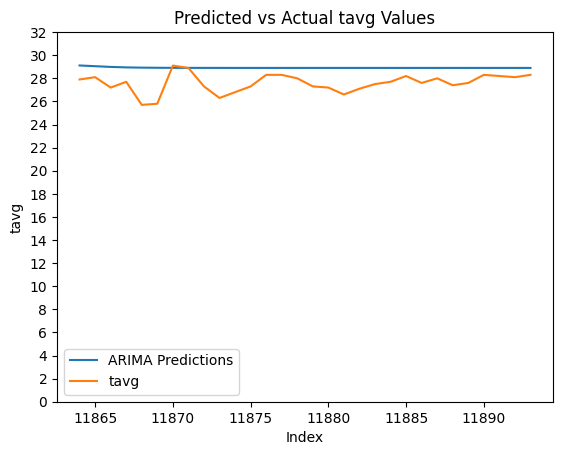

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
mutest['tavg'].plot(legend=True)

# Set the title and axis labels
plt.title('Predicted vs Actual tavg Values')
plt.xlabel('Index')
plt.ylabel('tavg')

# Set the y-axis ticks to intervals of 10
plt.yticks(range(0, max(mutest['tavg'].astype(int))+5, 2))

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mutest['tavg'].mean()
rmse=sqrt(mean_squared_error(pred,mutest['tavg']))
print(rmse)

1.54166400617296


In [ ]:
mutest_mean = mutest['tavg'].mean()
print((rmse/mutest_mean) * 100) 

5.587088691131772
